# **Part of Cosmos by OpenGenus Foundation**  


### Importing Libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

### Loading CIFAR10 Dataset


In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()

print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
num_classes = len(set(y_test))
print("number of classes:", num_classes)

number of classes: 10


In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
x_train[0].shape

(32, 32, 3)

## Building the model using the **Functional API**


In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.2)(x)

x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = MaxPooling2D(pool_size=(2, 2))(x)

x = Dropout(0.25)(x)

x = GlobalMaxPooling2D()(x)

x = Flatten()(x)

x = Dropout(rate=0.25)(x)

x = Dense(1024, activation='relu')(x)

x = Dropout(0.2)(x)

x = Dense(units=num_classes, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.layers

## Compile model

In [ ]:
# Note: make sure you are using the GPU for this! It takes time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
len(model.layers)

25

## Training process of the model

In [ ]:
# r = model.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=50)

## Using **Data augmentation** to improve accuracy


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off

batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

print(steps_per_epoch)

1562


In [ ]:
r = model.fit(train_generator, validation_data=(x_te22st, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.6063 - accuracy: 0.4181 - val_loss: 1.2965 - val_accuracy: 0.5320
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 1.1716 - accuracy: 0.5812 - val_loss: 1.1059 - val_accuracy: 0.6171
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 1.0092 - accuracy: 0.6448 - val_loss: 1.0838 - val_accuracy: 0.6403
Epoch 4/50
1562/1562 [==============================] - 26s 16ms/step - loss: 0.9049 - accuracy: 0.6867 - val_loss: 1.0904 - val_accuracy: 0.6373
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8307 - accuracy: 0.7160 - val_loss: 0.7522 - val_accuracy: 0.7540
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7823 - accuracy: 0.7330 - val_loss: 0.7103 - val_accuracy: 0.7644
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7412 - accuracy: 0.7492 - val_loss: 0.7256 -

## Plot Loss per iteration


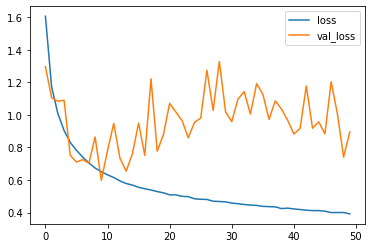

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

### Plot Accuracy per iteration


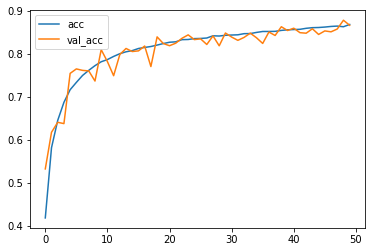

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization

[[897  10  20   3   3   0   5   4  36  22]
 [  8 941   0   0   1   1   2   0  11  36]
 [ 50   1 797  20  33  21  54   9  10   5]
 [ 20   4  41 677  34  73 106  11  21  13]
 [ 11   1  23  21 854   8  58  16   7   1]
 [  5   3  29  81  21 782  52  20   5   2]
 [  7   1  15  12   3   2 954   2   2   2]
 [ 14   1  14  24  32  13  14 879   1   8]
 [ 33   8   3   1   0   0   5   0 938  12]
 [ 11  32   1   0   0   0   2   0  15 939]]



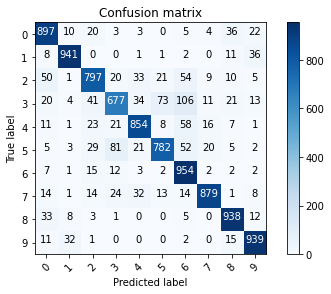

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
  
  print()
  print(cm)
  print()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

## Let's see some misclassified examples


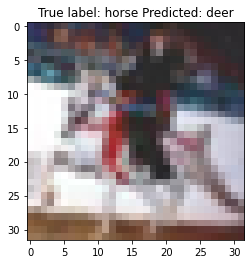

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

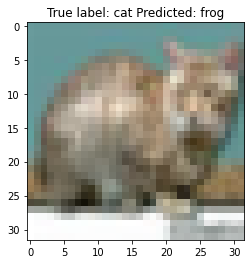

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

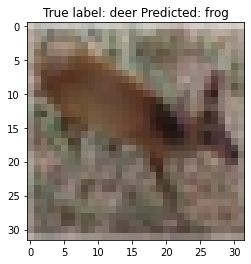

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# **Some of correct Classification results**


Text(0.5, 1.0, 'True label: automobile Predicted label: automobile ')

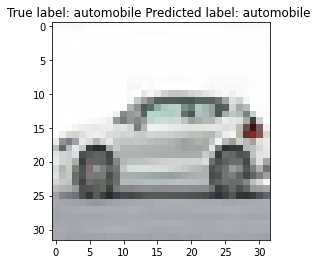

In [ ]:
true_labels = np.where(p_test == y_test)[0]

current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

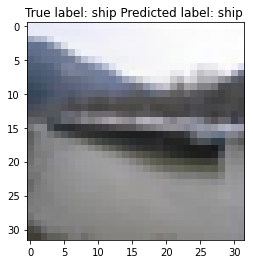

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: frog Predicted label: frog ')

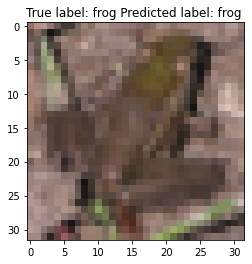

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: bird Predicted label: bird ')

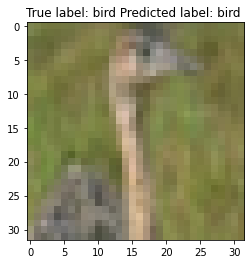

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: bird Predicted label: bird ')

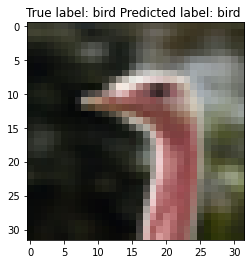

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: ship Predicted label: ship ')

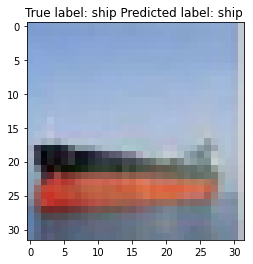

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: horse Predicted label: horse ')

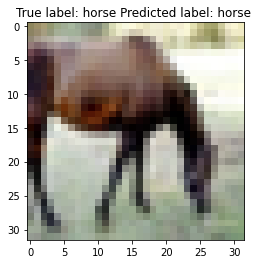

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: deer Predicted label: deer ')

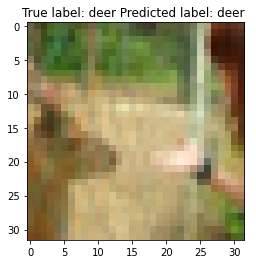

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: ship Predicted label: ship ')

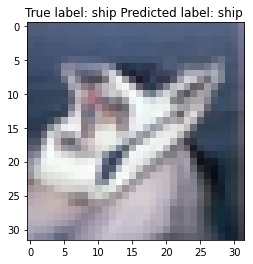

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

Text(0.5, 1.0, 'True label: deer Predicted label: deer ')

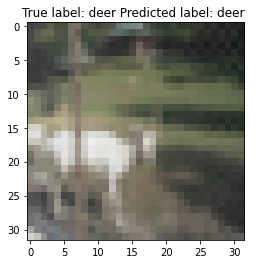

In [ ]:
current_index = np.random.choice(true_labels)
plt.imshow(x_test[current_index], cmap='gray')
plt.title("True label: %s Predicted label: %s " % (labels[y_test[current_index]], labels[p_test[current_index]]))

### Model summary

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)       